# EDA without segmentaiton

## Load dataset

In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

# path
raw_files = [
    '/content/drive/My Drive/concatenated/emg_all_participants.csv',
    '/content/drive/My Drive/concatenated/imu_all_participants.csv',
    '/content/drive/My Drive/concatenated/ips_all_participants.csv',
    '/content/drive/My Drive/concatenated/mocap_all_participants.csv'
]


# Load dataset
def load_datasets(file_paths):
    datasets = {}
    for file_path in file_paths:
        try:
            # Extract the key part of the filename as a dictionary key
            dataset_name = file_path.split('/')[-1].split('_')[0]
            df = pd.read_csv(file_path)
            datasets[dataset_name] = df
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return datasets


raw_datasets = load_datasets(raw_files)


dataset_info = [{"Dataset Name": name, "Shape": df.shape, "Rows": df.shape[0], "Columns": df.shape[1]}
                for name, df in raw_datasets.items()]
dataset_info_df = pd.DataFrame(dataset_info)

print(dataset_info_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Dataset Name           Shape      Rows  Columns
0          emg  (11348420, 18)  11348420       18
1          imu    (567439, 56)    567439       56
2          ips   (352872, 684)    352872      684
3        mocap    (567439, 80)    567439       80


In [ ]:
emg_df = raw_datasets["emg"]
print(emg_df.head())

     R_Vlat      R_RF      R_ST       R_TA    L_Vlat      L_RF      L_ST  \
0 -0.704956  1.309204 -2.316284 -20.242310 -6.747437  2.920532 -1.208496   
1  2.014160  1.309204 -2.316284 -16.415405 -1.208496  2.618408 -1.208496   
2 -0.704956  1.309204 -2.316284 -16.314697 -1.107788  1.107788 -1.208496   
3 -0.704956  1.309204 -2.316284 -12.387085 -2.316284 -1.913452 -1.208496   
4 -0.704956  1.309204 -2.316284 -11.581421  1.208496 -2.618408 -1.208496   

       L_TA      R_MG       R_LG      R_SOL    R_IL      L_MG       L_LG  \
0 -6.948853 -0.906372 -12.387085  54.180908 -2.5177 -0.704956  10.876465   
1 -6.948853 -0.906372 -12.387085  54.180908 -2.5177 -0.704956  10.876465   
2 -6.948853 -0.906372 -12.387085  54.180908 -2.5177 -0.704956  10.876465   
3 -6.948853 -0.906372 -12.387085  54.180908 -2.5177 -0.704956  10.876465   
4 -6.948853 -0.906372 -12.387085  54.180908 -2.5177 -0.704956  10.876465   

     L_SOL     L_IL  people_id category  
0 -3.52478 -3.52478          1     back  
1 

In [ ]:
imu_df = raw_datasets["imu"]
print(imu_df.head())

   Head_Acc_X  Head_Acc_Y  Head_Acc_Z  Head_Gyr_X  Head_Gyr_Y  Head_Gyr_Z  \
0    8.902975    0.412529    4.052022   -0.015015    0.010260   -0.009929   
1    8.912331    0.391603    4.045956   -0.010874    0.014445   -0.006227   
2    8.889990    0.384217    4.039017   -0.013686    0.012110   -0.005442   
3    8.904131    0.372749    4.011355   -0.011734    0.018341   -0.003756   
4    8.915459    0.360066    4.064784   -0.005845    0.016175    0.008792   

   Head_Roll  Head_Pitch   Head_Yaw  Waist_Acc_X  ...  R_F_Acc_Y  R_F_Acc_Z  \
0 -12.639535  -10.234849  30.077293     9.578385  ...  -1.903201   9.019931   
1 -12.643968  -10.226859  30.069993     9.540294  ...  -1.942165   9.052294   
2 -12.647921  -10.220573  30.063655     9.561864  ...  -1.965231   9.028006   
3 -12.654819  -10.211424  30.056963     9.566546  ...  -1.979159   9.013625   
4 -12.664689  -10.206186  30.059231     9.533102  ...  -1.939386   9.027615   

   R_F_Gyr_X  R_F_Gyr_Y  R_F_Gyr_Z   R_F_Roll  R_F_Pitch    R_

In [ ]:
ips_df = raw_datasets["ips"]
print(ips_df.head())

     0    1    2    3    4    5    6     7    8    9  ...  674  675  676  677  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.68  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.46  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.68  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.46  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.46  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   678   679  680  681  people_id  category  
0  0.0  1.12  0.0  0.0          1      back  
1  0.0  1.12  0.0  0.0          1      back  
2  0.0  1.12  0.0  0.0          1      back  
3  0.0  1.12  0.0  0.0          1      back  
4  0.0  1.12  0.0  0.0          1      back  

[5 rows x 684 columns]


In [ ]:
mocap_df = raw_datasets["mocap"]
print(mocap_df.head())

       IJ_x      IJ_y      IJ_z      C7_x      C7_y      C7_z      RA_x  \
0  0.360232  0.036676  1.339469  0.182676  0.022713  1.402011  0.295808   
1  0.360224  0.036675  1.339442  0.182736  0.022733  1.402016  0.295852   
2  0.360238  0.036663  1.339396  0.182752  0.022742  1.402047  0.295857   
3  0.360245  0.036648  1.339374  0.182005  0.023425  1.402234  0.295907   
4  0.360242  0.036649  1.339332  0.182054  0.023421  1.402266  0.295949   

       RA_y      RA_z      LA_x  ...    L_LM_y    L_LM_z   L_CAL_x   L_CAL_y  \
0 -0.130378  1.394512  0.270449  ...  0.230522  0.097288  0.175458  0.150199   
1 -0.130367  1.394480  0.270494  ...  0.230771  0.097520  0.175447  0.150244   
2 -0.130383  1.394484  0.270543  ...  0.230781  0.097522  0.175443  0.150229   
3 -0.130379  1.394480  0.270465  ...  0.229892  0.096819  0.175402  0.150215   
4 -0.130379  1.394464  0.270525  ...  0.228305  0.095568  0.175413  0.150205   

    L_CAL_z   L_MH1_x   L_MH1_y   L_MH1_z  people_id  category  
0  

In [ ]:
print(emg_df.dtypes)


R_Vlat       float64
R_RF         float64
R_ST         float64
R_TA         float64
L_Vlat       float64
L_RF         float64
L_ST         float64
L_TA         float64
R_MG         float64
R_LG         float64
R_SOL        float64
R_IL         float64
L_MG         float64
L_LG         float64
L_SOL        float64
L_IL         float64
people_id      int64
category      object
modality      object
dtype: object


## General analysis

#### Class distribution across modalities

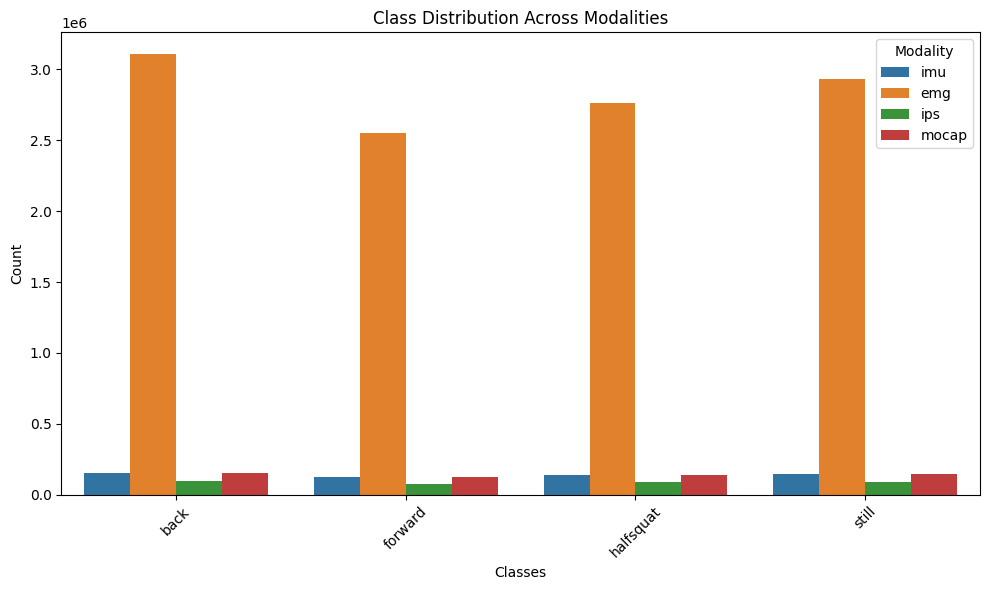

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data in DataFrame imu_df, emg_df, ips_df, mocap_df

imu_df['modality'] = 'imu'
emg_df['modality'] = 'emg'
ips_df['modality'] = 'ips'
mocap_df['modality'] = 'mocap'



all_data = pd.concat([imu_df, emg_df, ips_df, mocap_df], ignore_index=True)


if "category" not in all_data.columns:
    print("Error: 'category' column is missing in the combined dataset.")


plt.figure(figsize=(10, 6))
sns.countplot(data=all_data, x="category", hue="modality")
plt.title("Class Distribution Across Modalities")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(title="Modality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#raw_datasets = {"emg": emg_df, "imu": imu_df, "ips": ips_df, "mocap": mocap_df}

def plot_class_distribution(dataset_name, df):
    """
    Plotting category distribution histograms and pie charts
    :param dataset_name: dataset name
    :param df: dataset DataFrame
    """
    #  Distribution of statistical categories
    class_counts = df['category'].value_counts()

    #  Plotting bar charts
    plt.figure(figsize=(10, 5))
    class_counts.plot(kind='bar')
    plt.title(f"Class Distribution in {dataset_name}")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # pie charts
    plt.figure(figsize=(7, 7))
    class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
    plt.title(f"Class Proportion in {dataset_name}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


for dataset_name, df in raw_datasets.items():
    print(f"Analyzing {dataset_name} dataset:")
    print(df['category'].value_counts())
    #plot_class_distribution(dataset_name, df)


Analyzing emg dataset:
category
back         3105265
still        2930170
halfsquat    2762361
forward      2550624
Name: count, dtype: int64
Analyzing imu dataset:
category
back         155268
still        146518
halfsquat    138119
forward      127534
Name: count, dtype: int64
Analyzing ips dataset:
category
back         97567
halfsquat    88692
still        87905
forward      78708
Name: count, dtype: int64
Analyzing mocap dataset:
category
back         155268
still        146517
halfsquat    138119
forward      127535
Name: count, dtype: int64


#### Modality distributions

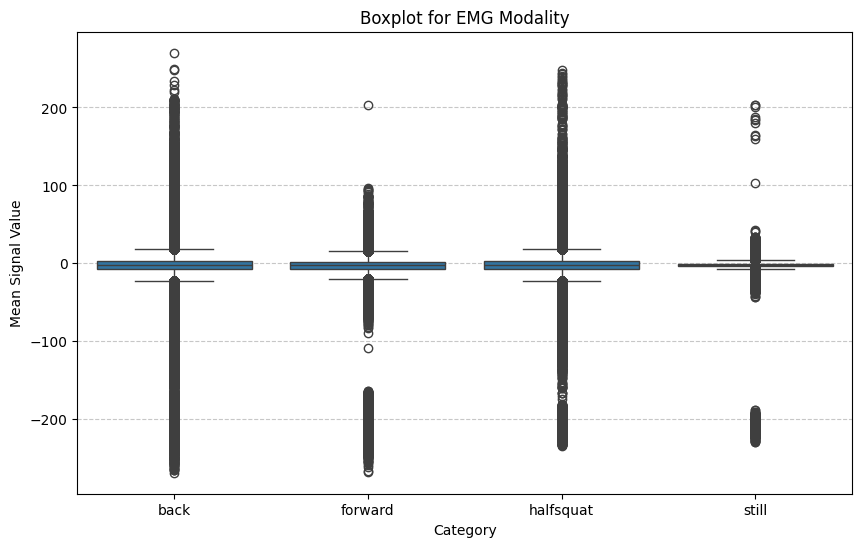

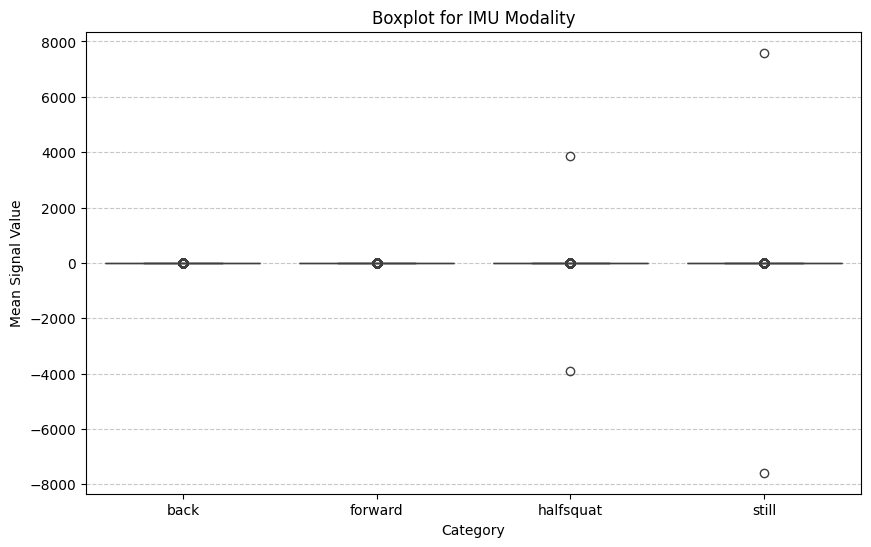

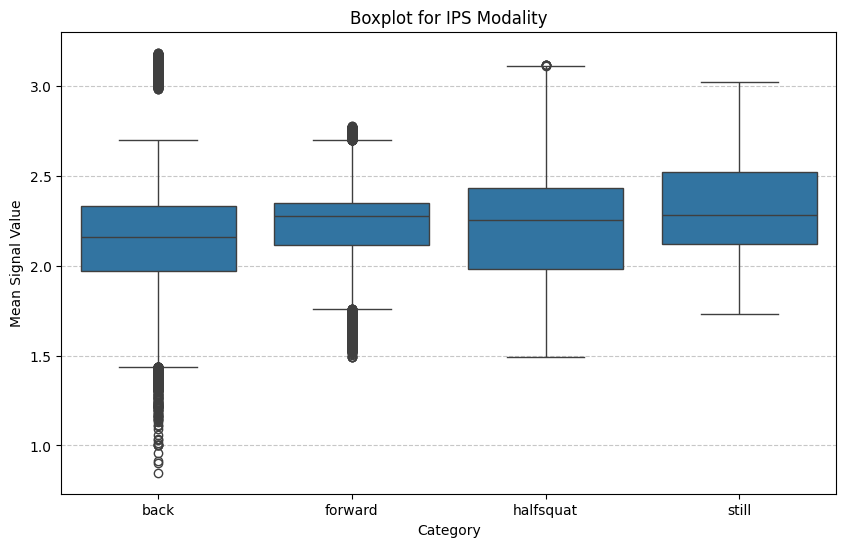

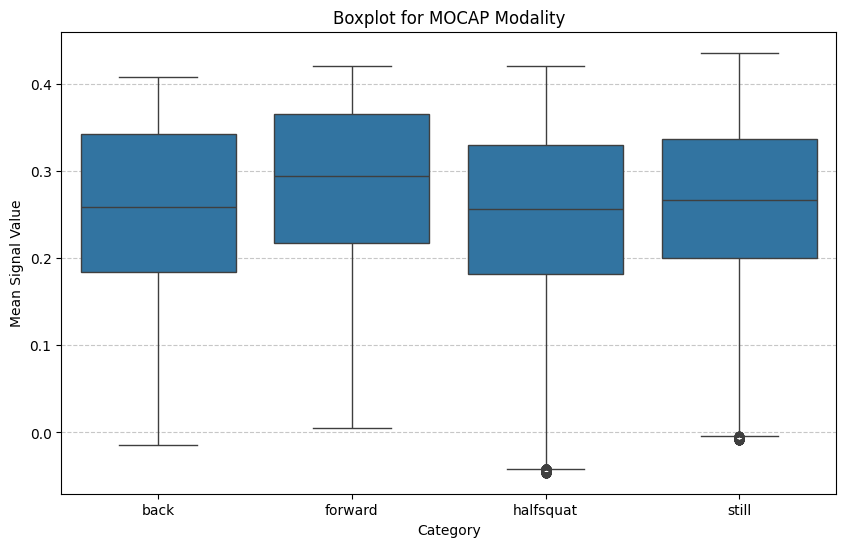

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting individual modal distributions
def plot_modality_distributions(modality_name, df):
    """
    Plotting the distribution of categories for a single modality (box-and-line plot)
    :param modality_name: modality name (string)
    :param df: dataset DataFrame (with people_id and category columns)
    """

    df['mean_signal'] = df.drop(['people_id', 'category','modality'], axis=1).mean(axis=1)

    # box-and-line diagram
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='category', y='mean_signal')
    plt.title(f"Boxplot for {modality_name} Modality")
    plt.xlabel("Category")
    plt.ylabel("Mean Signal Value")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_modality_distributions("EMG", emg_df)
plot_modality_distributions("IMU", imu_df)
plot_modality_distributions("IPS", ips_df)
plot_modality_distributions("MOCAP", mocap_df)



The boxplot of the EMG modal shows the distribution of the mean signal values for each category. It can be observed that the back and halfsquat categories have a large range of data, while forward and still have a relatively small range.

The signals in the back and halfsquat categories contain a large number of high amplitude outliers, which may be caused by violent movements or fluctuations in the measurement equipment.


IMU Modal Analysis
The distribution of signal values in IMU modes is extremely concentrated, with the majority of signals symmetrically distributed around zero.
Extreme outliers exist, such as values up to 8000 in the still category.

There is consistency in the distribution between categories, with the medians and ranges of all categories being very similar except for a few outliers, suggesting that the IMU signal may be less discriminating between different action categories.
IPS modal analysis:

Box plots of the IPS modality show significant differences between categories
The wider range of signals in the halfsquat, back, and still categories may indicate that these actions have a more complex effect on the pressure distribution.
The forward category has a relatively narrow range, but also contains some higher outliers.
The relatively high median for the still category may correspond to a stable pressure distribution during the maneuver, while the forward category has a relatively low median.

MoCap Mode Analysis

The signal distribution of the MoCap mode is very uniform, with highly consistent medians and ranges across all categories, suggesting that the effect of the action on the mode is stable.
There are a few outliers in each category, but the range is within reasonable limits.

The EMG and IPS modes have a greater potential for category differentiation.
The high amplitude variability of EMG and the clear category differences of IPS suggest that these two modalities may have greater discriminative power in categorization tasks.

The IMU and MoCap modes are less discriminative, the signal distributions of IMU and MoCap are more consistent, and may need to be combined with other modes or further feature extraction to enhance the discriminative ability.

There are obvious outliers in all modalities, which may adversely affect the training and prediction of the model and need to be further dealt with.



#### Density distribution

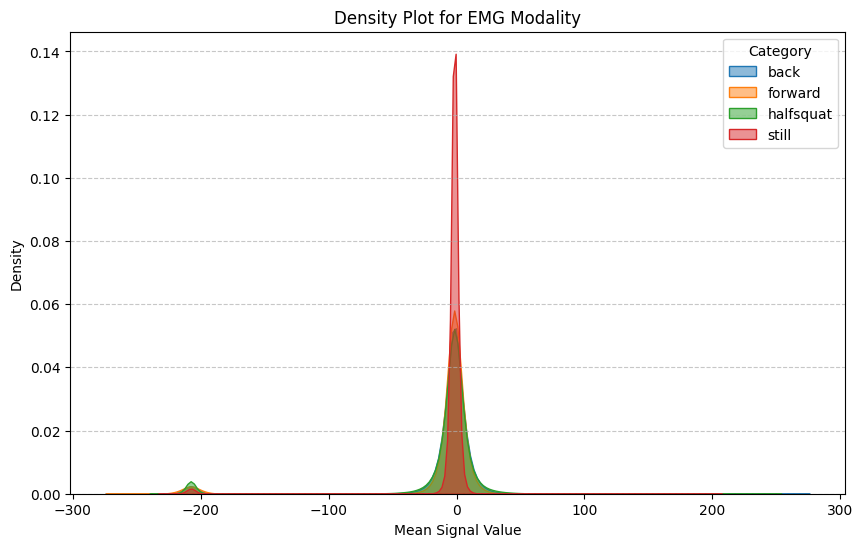

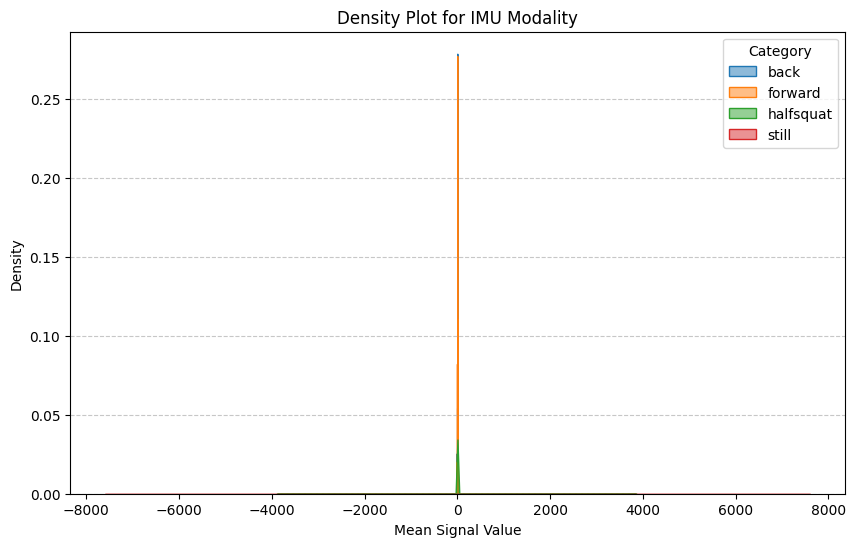

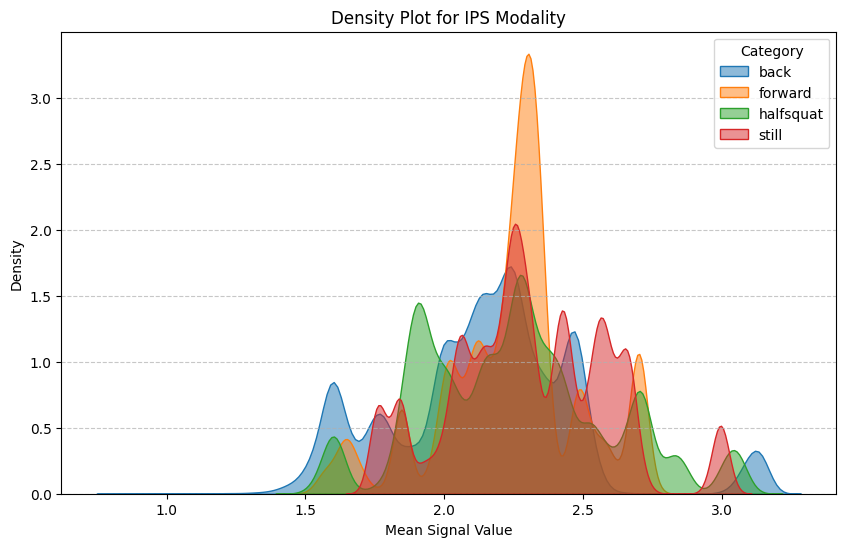

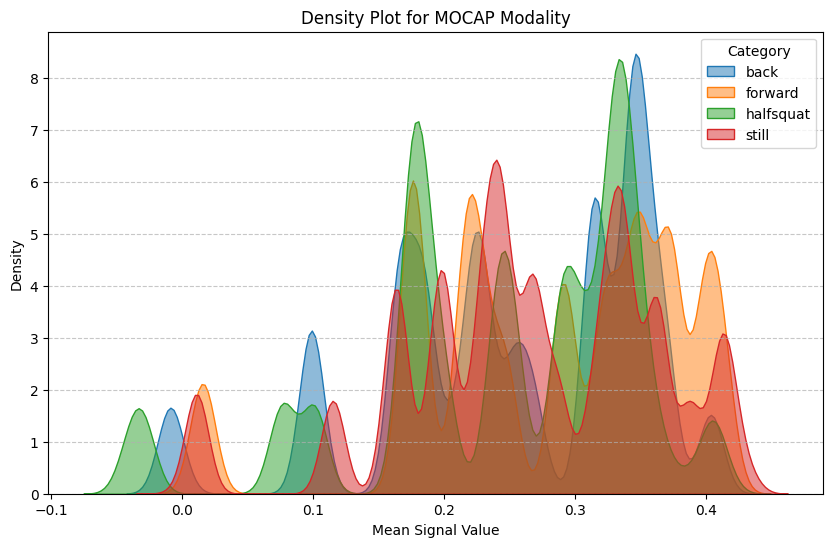

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting density map functions for individual modes
def plot_density_by_modality(modality_name, df):
    """
    Plotting the density distribution of a single modality
    :param modality_name: modality name (string)
    :param df: dataset DataFrame (with people_id and category columns)
    """
    # Calculate the signal mean for each row, excluding non-numeric columns
    df['mean_signal'] = df.drop(['people_id', 'category','modality'], axis=1).mean(axis=1)


    plt.figure(figsize=(10, 6))
    for category in df['category'].unique():
        subset = df[df['category'] == category]['mean_signal']
        sns.kdeplot(
            subset,
            label=category,
            fill=True,
            alpha=0.5
        )
    plt.title(f"Density Plot for {modality_name} Modality")
    plt.xlabel("Mean Signal Value")
    plt.ylabel("Density")
    plt.legend(title="Category")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_density_by_modality("EMG", emg_df)
plot_density_by_modality("IMU", imu_df)
plot_density_by_modality("IPS", ips_df)
plot_density_by_modality("MOCAP", mocap_df)


These density plots show the signal distribution characteristics of each category under different modal EMG, IMU, IPS, and MOCAP, from which this information can be observed:

1. EMG modal analysis
The density distribution of the signal values in the plots exhibits a very strong peak around 0, which indicates that most of the EMG data is concentrated in the low amplitude region.
The differences between categories are not significant, but a small number of abnormal signal values (e.g., greater than 200 or less than -200) can be observed.
The EMG signal is an important indication of muscle activity, and although the signal is concentrated, dynamic movements such as back (back) versus halfsquat (halfsquat) may show potentially distinguishing features in the tail region of the distribution, which is of research value for classification tasks.

2. IMU modal analysis
Signal densities were concentrated around 0 with significant outliers (e.g., greater than 7000 or less than -8000).
There is no significant difference in the distribution between categories.
Most of the dynamic features of the IMU signals may be normalized to outliers, suggesting that signal normalization or feature extraction may need further optimization; IMU signals may be more useful for capturing a wide range of dynamic motions.

3. IPS Modal Analysis
The distribution of the signals is mainly concentrated between 1.5 and 3, with some overlap among the four categories, but slight differences in the locations of the peaks of the categories can be observed (e.g., forward is around 2.5 and still is around 2.8).
The distribution of the categories is clearly separated, indicating that the IPS signal has a better ability to distinguish between different motion states.
The IPS modality captures better category separation, which may be more informative especially in fine-motion categorization or when the motion amplitude is small (e.g., still and forward).

4. MOCAP modal analysis
The density distributions of the signal values showed multi-peak characteristics, and there were obvious differences in some of the peak locations between different categories, e.g., the signal distributions of back and halfsquat overlapped significantly around 0.2 and 0.3.
The multiple peaks indicate that the MOCAP data can reflect the complex motion characteristics.
The signal distribution of MOCAP is suitable for the study of the complex dynamic characteristics of different motion postures, such as the extraction of time series features in dynamic posture recognition.


## Temporal visualisation for person with id 1



### EMG

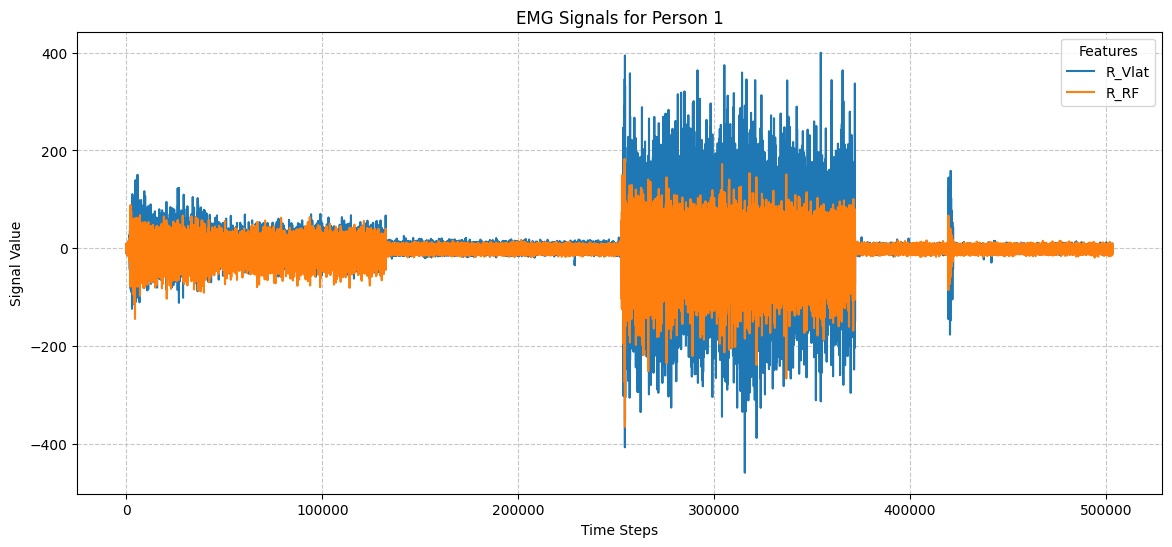

In [ ]:
# people_id = 1
emg_person1 = emg_df[emg_df['people_id'] == 1]

# features R_Vlat, R_RF
emg_features = ['R_Vlat', 'R_RF']


plt.figure(figsize=(14, 6))
for feature in emg_features:
    plt.plot(emg_person1.index, emg_person1[feature], label=feature)
plt.title("EMG Signals for Person 1")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Here we have chosen two muscles of the right leg R_Vlat (right lateral femoral) and R_RF (right rectus femoris) R_Vlat and R_RF are both important muscles of the lower limb, responsible for the extension movements of the knee joint, which change significantly during dynamic movements (e.g., walking, running, and deep squatting). From the figure, we both can observe that the overall trend of the two signals is relatively consistent.
The overall trend of the two signals is relatively consistent, but the fluctuation amplitude is different, which may be related to the functional differences between the two muscles.

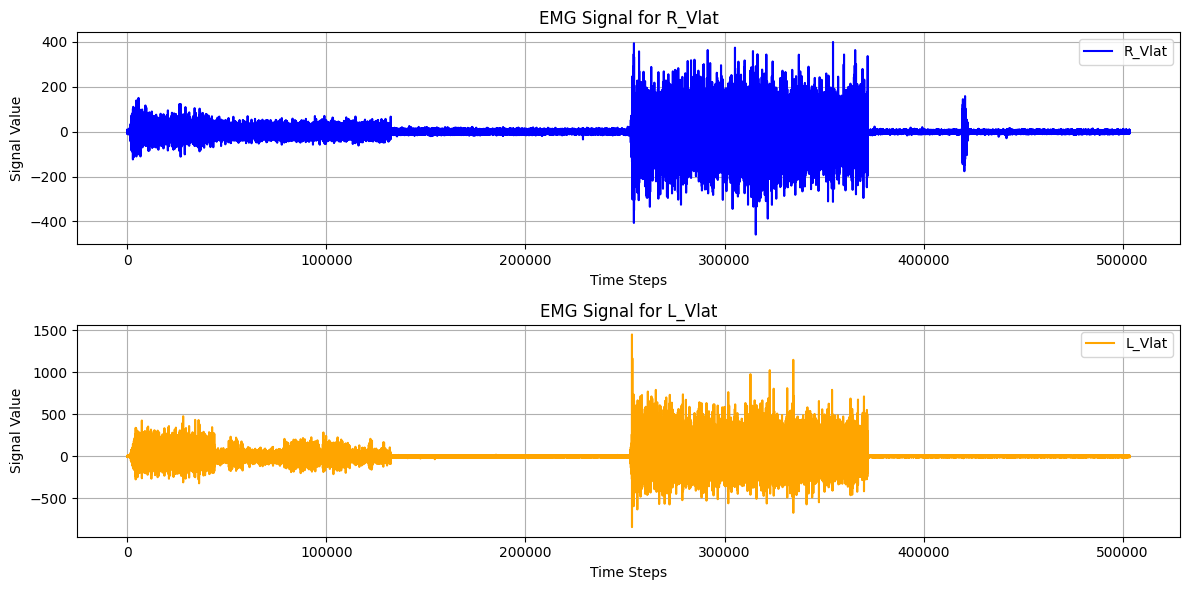

In [ ]:

plt.figure(figsize=(12, 6))

# R_Vlat
plt.subplot(2, 1, 1)
plt.plot(emg_person1.index, emg_person1['R_Vlat'], color='blue', label='R_Vlat')
plt.title('EMG Signal for R_Vlat')
plt.xlabel('Time Steps')
plt.ylabel('Signal Value')
plt.grid()
plt.legend()

# L_Vlat
plt.subplot(2, 1, 2)
plt.plot(emg_person1.index, emg_person1['L_Vlat'], color='orange', label='L_Vlat')
plt.title('EMG Signal for L_Vlat')
plt.xlabel('Time Steps')
plt.ylabel('Signal Value')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Here we have selected the symmetrical right leg lateral femoral muscle and the left leg lateral femoral muscle. We can observe that the signal amplitude is lower in the right leg, with an overall fluctuation range of about -400 to 400. The left leg has a higher fluctuation range, even exceeding 1000 at some stages.

Symmetry and coordination analysis of the two signals show similar temporal trends, suggesting that the left and right legs are coordinated in their movements in time.
However, the difference in amplitude suggests that there may be asymmetric force distribution or movement characteristics at some stages.
The signal amplitude of R_Vlat was overall lower than that of L_Vlat, suggesting that the left leg may have carried more load during the movement.
During high-intensity maneuvers (after 300,000 time steps), the activation intensity of L_Vlat was much higher than that of R_Vlat, which may be related to the asymmetry of the maneuver or the dominant characteristics of the left leg.


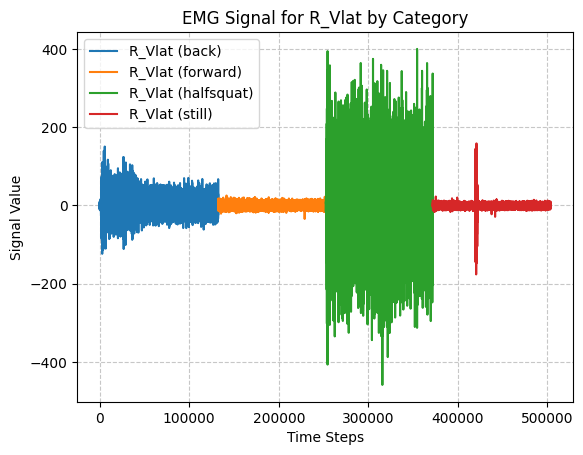

In [ ]:
for category in emg_person1['category'].unique():
    subset = emg_person1[emg_person1['category'] == category]
    plt.plot(subset.index, subset['R_Vlat'], label=f"R_Vlat ({category})")
plt.title("EMG Signal for R_Vlat by Category")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Here we chose to categorize the right lateral femoral muscle signals, and the figure shows the time series distribution of R_Vlat signals under different categories (back, forward, halfsquat, still).
The back and forward phases have low amplitude and are relatively smooth, indicating that these movements have a low level of activation of the R_Vlat.
The halfsquat phase signals fluctuated dramatically in amplitude and increased significantly in range, suggesting that stronger lateral femoral activation was required for this maneuver.
The still phase signal regression is smooth and low in amplitude, indicating that the muscle is at rest during this phase.
Inter-category differences:
The amplitude and range of fluctuations of the signals in each category are clearly visible, suggesting that R_Vlat is a very important feature in movement categorization.

### IMU

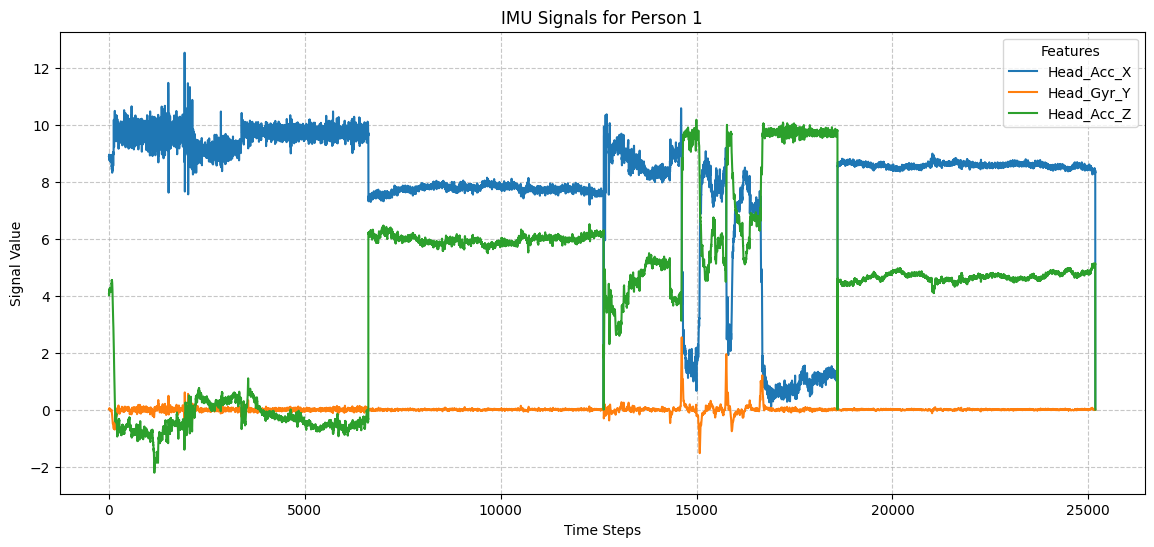

In [ ]:

imu_person1 = imu_df[imu_df['people_id'] == 1]

imu_features = ['Head_Acc_X', 'Head_Gyr_Y', 'Head_Acc_Z']


plt.figure(figsize=(14, 6))
for feature in imu_features:
    plt.plot(imu_person1.index, imu_person1[feature], label=feature)
plt.title("IMU Signals for Person 1")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()



First we selected the data Head_Acc_X, Head_Acc_Z, and Head_Gyr_Y for the person 1 IMU sensor head information.
Head_Acc_X reflects the linear motion in the horizontal forward and backward directions.
Head_Gyr_Y captures angular velocity characteristics in the rotational direction.
Head_Acc_Z captures motion in the vertical direction, supplemented by changes in gravitational acceleration.
Head_Acc_X, Head_Acc_Z, and Head_Gyr_Y show significant fluctuations over multiple time periods, indicating strong dynamic motion in these directions.

We can observe the trend of motion switching in the graphs. Around 5000, 10000, and 15000, we can observe a sudden change or a smooth recovery of the signal, which may correspond to the start, switch, or end of the motion.
Around 15000, Head_Acc_X decreases significantly, indicating a possible deceleration or completion of the action.
The steady state is a smoother signal in the 0-5000 and 20000-25000 timeframes, indicating less movement and possibly a stationary or slow-moving state.
In terms of directional differences, the amplitude change of Head_Acc_X is greater, indicating that movement in the X direction is the main component.
The change in Head_Gyr_Y is relatively flat, indicating that the rotational angular velocity may not be as significant as the linear acceleration.

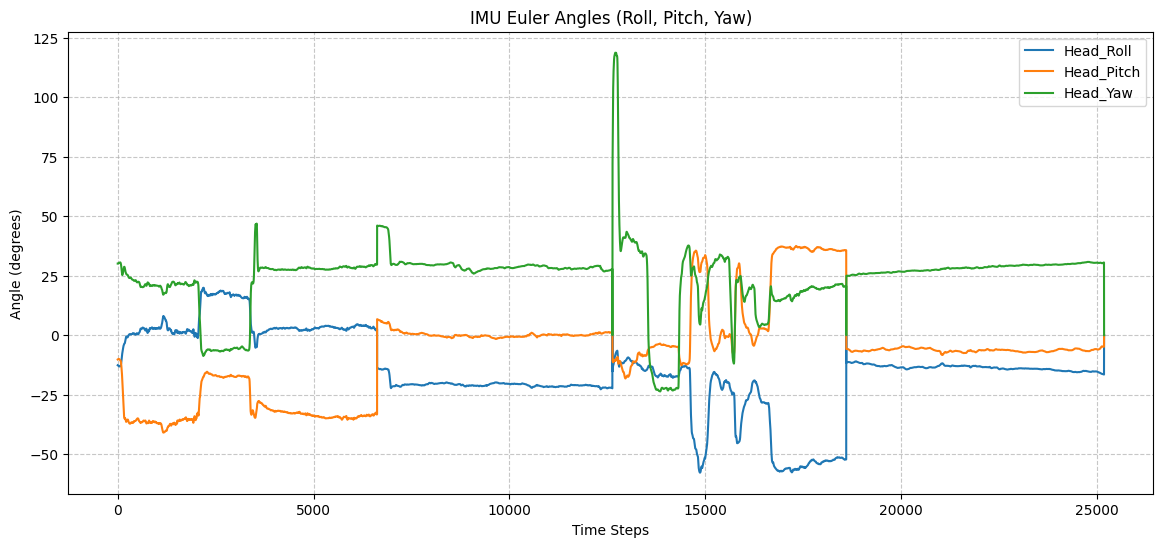

In [ ]:
# Euler Angles: Roll, Pitch, Yaw
euler_features = ['Head_Roll', 'Head_Pitch', 'Head_Yaw']
plt.figure(figsize=(14, 6))
for feature in euler_features:
    plt.plot(imu_person1.index, imu_person1[feature], label=feature)
plt.title("IMU Euler Angles (Roll, Pitch, Yaw)")
plt.xlabel("Time Steps")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Here we choose Roll, Pitch, and Yaw as the three features of the Euler angles of the first human head, because these three features can describe the posture of the head in 3D space comprehensively, which is very important for analyzing the stability of the posture and the dynamic movements.

The angles of Head_Roll, Head_Pitch, and Head_Yaw fluctuate significantly over time.
At certain points in time, such as around 15000, there are large angle jumps, which may reflect rapid pose switches or movement shifts.
Stability and anomalies:

In some segments (e.g., 6000-12000 and after 20000), the changes in Roll, Pitch, and Yaw were small, suggesting a more stable body posture.
Around 15000, there are large spikes in Yaw, which may be due to fast rotational movements captured by the sensor or data noise.
In terms of postural characteristics, the overall changes in Head_Roll and Head_Pitch are relatively smooth, which may be associated with forward, backward, or sideways tilting movements of the body.
Yaw changes are significant, indicating a significant rotational component to the movement.


### IPS

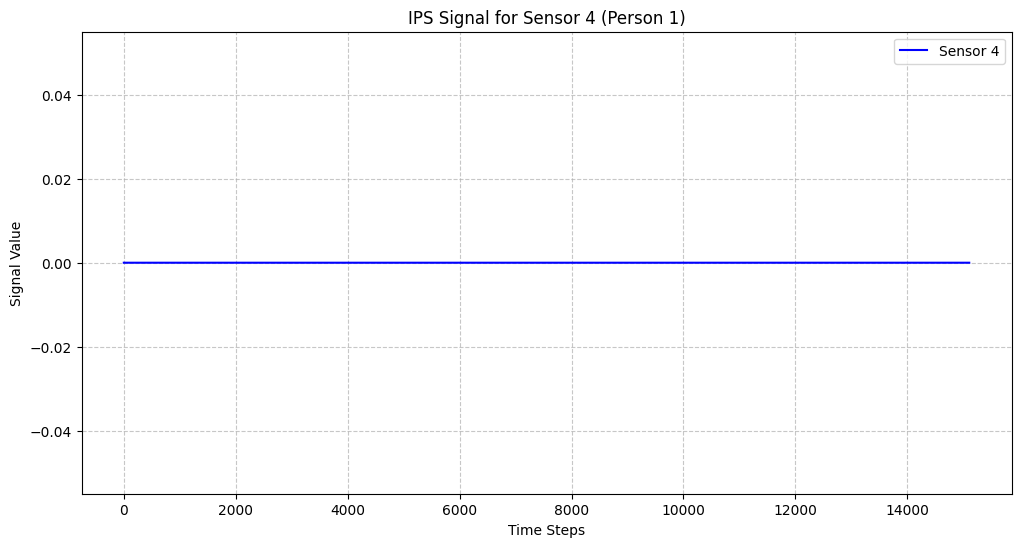

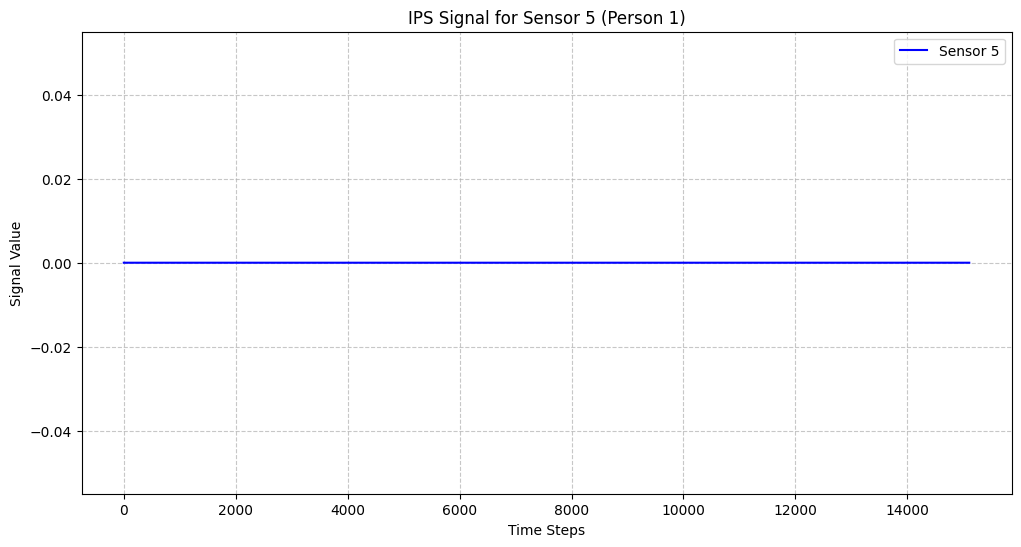

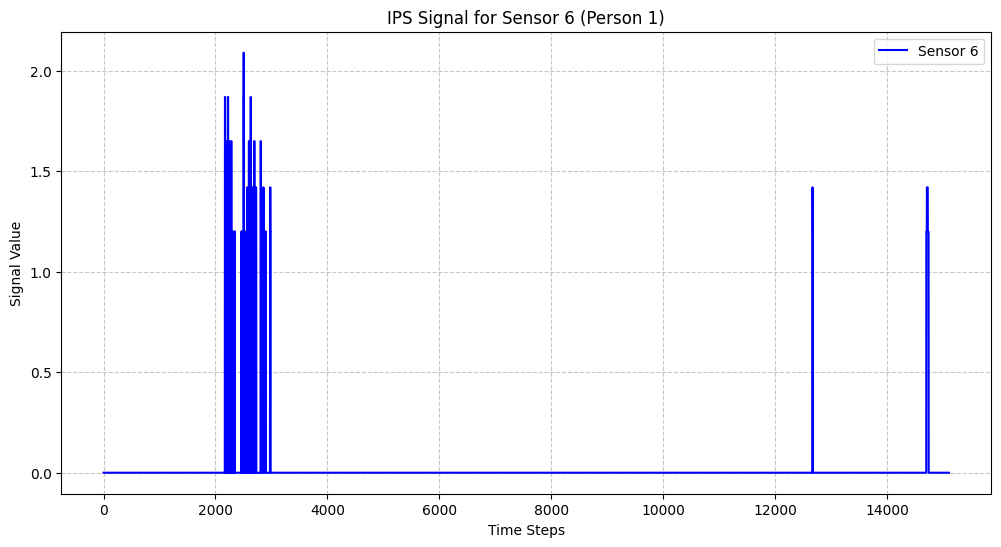

In [ ]:
import matplotlib.pyplot as plt


ips_person1 = ips_df[ips_df['people_id'] == 1]

# Selection feature of columns
ips_features = [ 4, 5, 6]


for feature in ips_features:
    plt.figure(figsize=(12, 6))
    plt.plot(ips_person1.index, ips_person1.iloc[:, feature], label=f"Sensor {feature}", color='b')
    plt.title(f"IPS Signal for Sensor {feature} (Person 1)")
    plt.xlabel("Time Steps")
    plt.ylabel("Signal Value")
    plt.legend(loc="upper right")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()


IPS data is collected from sensors on the sole of the foot or in the insole, and the location of different sensors may affect the signal characteristics. At rest, there may be no significant pressure on the toes, while the 6th sensor maybe in the center of the foot may be subject to more pressure changes.


### MOCAP

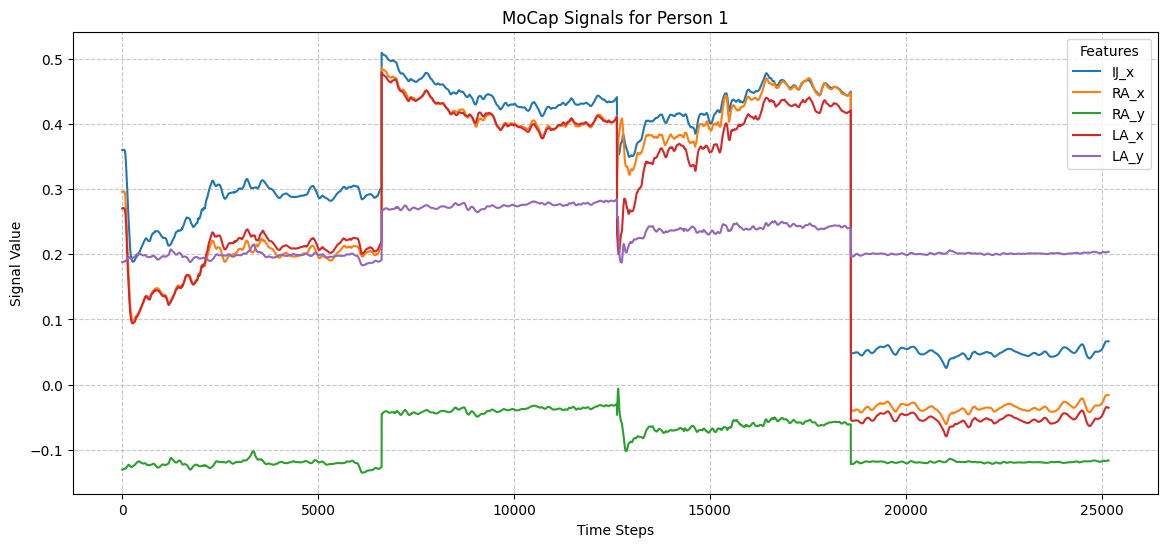

In [ ]:
mocap_person1 = mocap_df[mocap_df['people_id'] == 1]
mocap_features = ['IJ_x', 'RA_x', 'RA_y','LA_x','LA_y']

plt.figure(figsize=(14, 6))
for feature in mocap_features:
    plt.plot(mocap_person1.index, mocap_person1[feature], label=feature)
plt.title("MoCap Signals for Person 1")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()




Here we choose the features IJ_x, RA_x , RA_y, LA_x and LA_y.
IJ_x: represents the horizontal coordinates of the center point of the body (e.g., the midpoint of the clavicle), which reflects the overall movement and positional changes of the torso, and is a key datum for describing the whole-body movements.
RA_x and RA_y: represent the horizontal and vertical coordinates of the right arm, respectively. The right arm usually has a significant swing pattern in dynamic movements, and the trajectory of the right arm can be captured by these two features.
LA_x and LA_y: similar to the right arm features, they represent the horizontal and vertical coordinates of the left arm. The motion of the left arm can complement movement analysis, especially in symmetry and coordination assessment.
Horizontal (x-direction) and vertical (y-direction) are two important dimensions for describing movements, and the selection of these features provides a comprehensive picture of the spatial distribution of movements.
Directionality of movement analysis:
Horizontal features (IJ_x, RA_x, LA_x) are useful for analyzing forward and backward movement or body swing patterns.
Vertical features (RA_y, LA_y) can reveal the amplitude of movements such as arm lifting and dropping.
RA_x and LA_x, as well as RA_y and LA_y, can be used to compare the coordination and symmetry of left and right limb movements, which is critical in gait analysis or anomaly detection.
From the figure, we can observe


Dynamic phase: 0-6000 and 13000-18000 time periods, the feature fluctuation is more significant, indicating more active movements.
In the static phase: 6000-13000 and 18000-25000 time periods, the feature changes tend to stabilize, indicating that the movement is less or in a resting state.

# EDA after segmentaiton

## Load dataset

In [ ]:
from google.colab import drive
import pandas as pd


# path
raw_files = [
    '/content/drive/My Drive/method_2/aligned_datasets_emg.csv',
    '/content/drive/My Drive/method_2/aligned_datasets_ips.csv',
    '/content/drive/My Drive/method_2/aligned_datasets_imu.csv',
    '/content/drive/My Drive/method_2/aligned_datasets_mocap.csv'
]


def load_datasets(file_paths):
    datasets = {}
    for file_path in file_paths:
        try:
            # Extract the key part of the filename as a dictionary key
            dataset_name = file_path.split('/')[-1]
            df = pd.read_csv(file_path)
            datasets[dataset_name] = df
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return datasets


raw_datasets = load_datasets(raw_files)


dataset_info = [{"Dataset Name": name, "Shape": df.shape, "Rows": df.shape[0], "Columns": df.shape[1]}
                for name, df in raw_datasets.items()]
dataset_info_df = pd.DataFrame(dataset_info)

print(dataset_info_df.head())


                 Dataset Name          Shape    Rows  Columns
0    aligned_datasets_emg.csv   (113446, 67)  113446       67
1    aligned_datasets_ips.csv  (113446, 685)  113446      685
2    aligned_datasets_imu.csv   (113446, 57)  113446       57
3  aligned_datasets_mocap.csv  (113446, 156)  113446      156


In [ ]:
al_emg_df = raw_datasets["aligned_datasets_emg.csv"]
print(al_emg_df.head())

   Unnamed: 0  R_Vlat_rms    R_RF_rms  R_ST_rms  R_TA_rms  L_Vlat_rms  \
0           0    3.154265  292.758180        65        38    3.696738   
1           1    3.677968  326.696778        69        37    4.208268   
2           2    3.800089  267.279053        50        26    3.798007   
3           3    3.374545  292.657471        61        39    4.385206   
4           4    4.138228  382.388306        64        34    3.381075   

     L_RF_rms  L_ST_rms  L_TA_rms  R_MG_rms  ...   R_MG_zc     R_LG_zc  \
0  282.788085        56        34  3.684881  ...  3.497438  229.110718   
1  287.722779        62        32  4.657688  ...  9.854272  394.674683   
2  264.962768        44        20  3.792937  ...  5.891582  253.179930   
3  314.007569        66        32  5.642971  ...  7.399809  394.473266   
4  289.837644        61        32  5.003856  ...  6.837258  340.795900   

   R_SOL_zc  R_IL_zc   L_MG_zc     L_LG_zc  L_SOL_zc  L_IL_zc  category  \
0        51       27  3.413615  145.62377

In [ ]:
al_imu_df = raw_datasets["aligned_datasets_imu.csv"]
print(al_imu_df.head())

   Unnamed: 0  Head_Acc_X_mean  Head_Acc_Y_mean  Head_Acc_Z_mean  \
0           0         8.904977         0.384233         4.042627   
1           1         8.932194         0.351909         4.096076   
2           2         8.815747         0.335551         4.130934   
3           3         8.806464         0.340593         4.196511   
4           4         8.825958         0.329816         4.230514   

   Head_Gyr_X_mean  Head_Gyr_Y_mean  Head_Gyr_Z_mean  Head_Roll_mean  \
0        -0.011431         0.014266        -0.003312      -12.650186   
1         0.003090         0.032560         0.018453      -12.710571   
2         0.012052         0.044186         0.031625      -12.830830   
3         0.011351         0.028329         0.028800      -12.935340   
4         0.006858         0.029847         0.023784      -13.026545   

   Head_Pitch_mean  Head_Yaw_mean  ...  R_F_Acc_Y_mean  R_F_Acc_Z_mean  \
0       -10.219978      30.065427  ...       -1.945828        9.028294   
1       -1

In [ ]:
al_ips_df = raw_datasets["aligned_datasets_ips.csv"]
print(al_ips_df.head())

   Unnamed: 0  0_mean  1_mean  2_mean  3_mean  4_mean  5_mean  6_mean  \
0           0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           1     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           2     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           3     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     7_mean  8_mean  ...  674_mean  675_mean  676_mean  677_mean  678_mean  \
0  1.606667     0.0  ...       0.0       0.0       0.0       0.0       0.0   
1  1.460000     0.0  ...       0.0       0.0       0.0       0.0       0.0   
2  1.460000     0.0  ...       0.0       0.0       0.0       0.0       0.0   
3  1.680000     0.0  ...       0.0       0.0       0.0       0.0       0.0   
4  1.606667     0.0  ...       0.0       0.0       0.0       0.0       0.0   

   679_mean  680_mean  681_mean  category  person_id  
0      1.12       0.0       0.0      

In [ ]:
al_mocap_df = raw_datasets["aligned_datasets_mocap.csv"]
print(al_mocap_df.head())

   Unnamed: 0  C7_mean_x  C7_mean_y  C7_mean_z  RA_mean_x  RA_mean_y  \
0           0   0.182445   0.023007   1.402115   0.295875  -0.130377   
1           1   0.182231   0.023087   1.402198   0.296074  -0.130325   
2           2   0.182379   0.022964   1.402230   0.296210  -0.130333   
3           3   0.182557   0.022945   1.402290   0.296361  -0.130337   
4           4   0.182692   0.022905   1.402271   0.296523  -0.130310   

   RA_mean_z  LA_mean_x  LA_mean_y  LA_mean_z  ...  L_LM_velocity_y  \
0   1.394484   0.270495   0.187968   1.399205  ...        -0.000554   
1   1.394413   0.270739   0.188166   1.399469  ...        -0.002312   
2   1.394380   0.270884   0.188148   1.399508  ...        -0.000166   
3   1.394363   0.271069   0.188148   1.399518  ...         0.000001   
4   1.394320   0.271170   0.188165   1.399493  ...         0.000018   

   L_LM_velocity_z  L_CAL_velocity_x  L_CAL_velocity_y  L_CAL_velocity_z  \
0        -0.000430         -0.000011      1.492492e-06         -

## Genral data Analysis

#### Class distribution across modalities

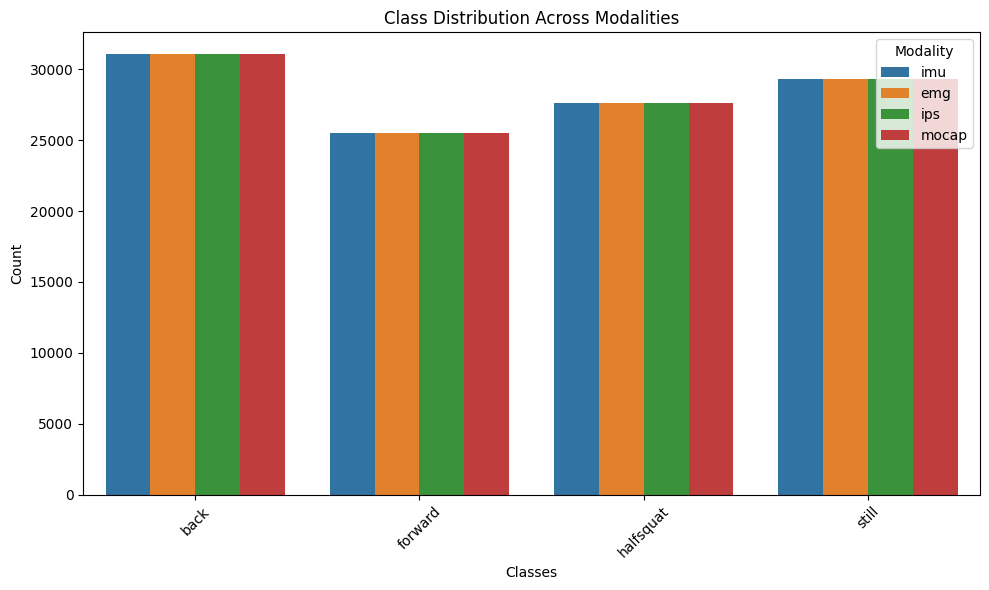

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data in DataFrame imu_df, emg_df, ips_df, mocap_df

al_imu_df['modality'] = 'imu'
al_emg_df['modality'] = 'emg'
al_ips_df['modality'] = 'ips'
al_mocap_df['modality'] = 'mocap'



all_data = pd.concat([al_imu_df, al_emg_df, al_ips_df, al_mocap_df], ignore_index=True)


if "category" not in all_data.columns:
    print("Error: 'category' column is missing in the combined dataset.")


plt.figure(figsize=(10, 6))
sns.countplot(data=all_data, x="category", hue="modality")
plt.title("Class Distribution Across Modalities")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(title="Modality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar graphs represent the distribution of the four categories of samples (backward, forward, half-squat, and stationary) for each mode (imu, emg, ips, and mocap).
We can observe that comparing to the original data, for imu, emg, ips and mocap is that the data becomes balanced and the number of samples in each category is to be distributed consistently across the modes. This suggests that the feature extraction process is balanced, which may help maintain fairness in downstream tasks such as classification.

In [ ]:
print(f"Missing values in EMG dataset:\n{al_emg_df.isnull().sum()}")
print(f"Non-numeric columns in EMG dataset:\n{al_emg_df.select_dtypes(exclude=['number']).columns}")


Missing values in EMG dataset:
Unnamed: 0    0
R_Vlat_rms    0
R_RF_rms      0
R_ST_rms      0
R_TA_rms      0
             ..
L_SOL_zc      0
L_IL_zc       0
category      0
person_id     0
modality      0
Length: 68, dtype: int64
Non-numeric columns in EMG dataset:
Index(['category', 'modality'], dtype='object')


#### Modality distributions

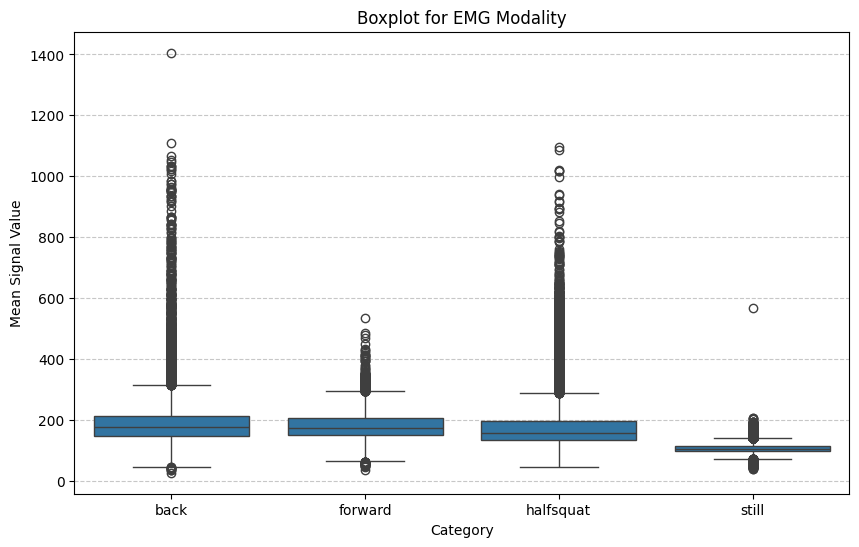

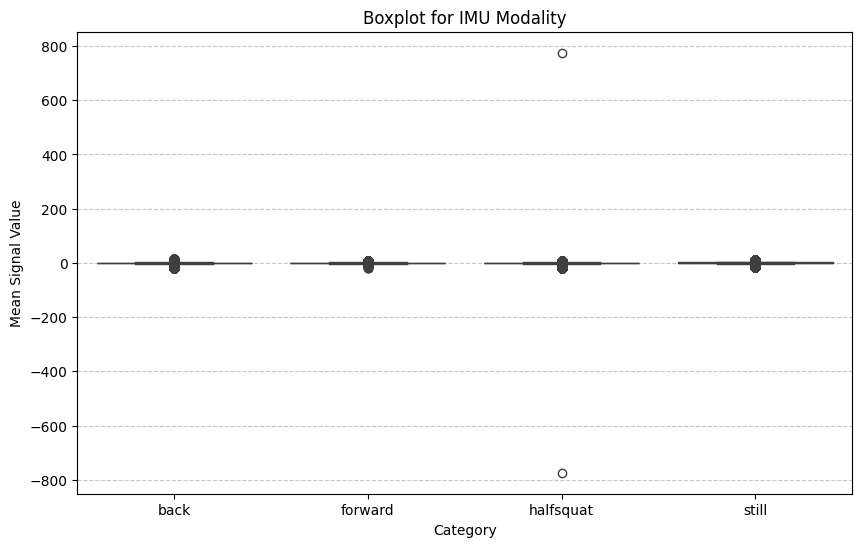

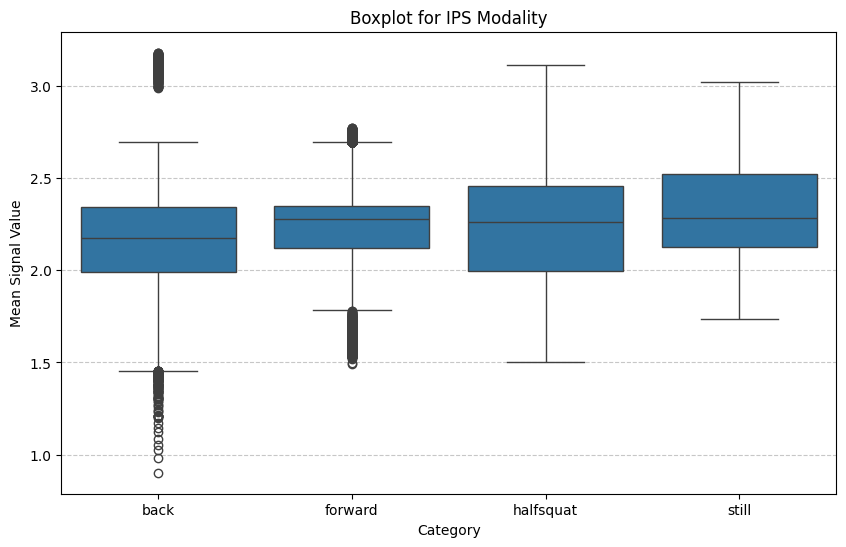

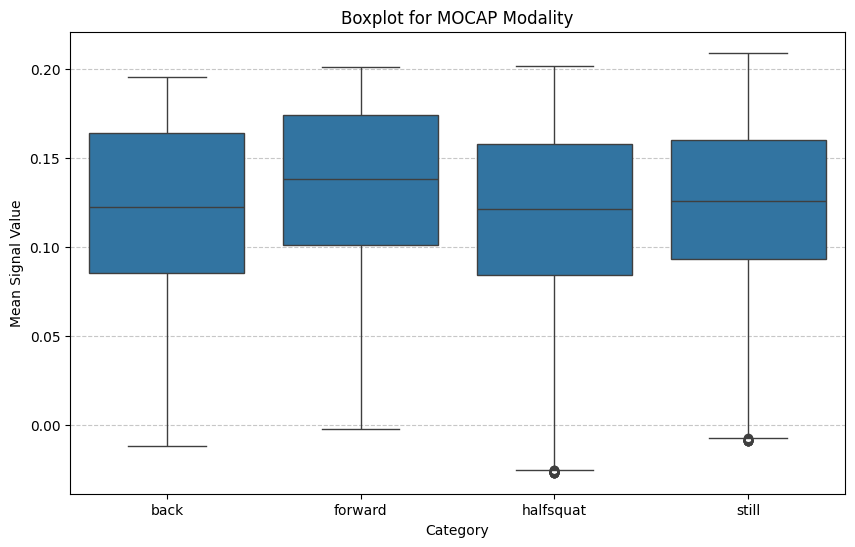

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting individual modal distributions
def plot_modality_distributions(modality_name, df):
    """
    Plotting the distribution of categories for a single modality (box-and-line plot)
    :param modality_name: modality name (string)
    :param df: dataset DataFrame (with people_id and category columns)
    """

    df['mean_signal'] = df.drop(['person_id', 'category','modality','Unnamed: 0'], axis=1).mean(axis=1)

    # box-and-line diagram
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='category', y='mean_signal')
    plt.title(f"Boxplot for {modality_name} Modality")
    plt.xlabel("Category")
    plt.ylabel("Mean Signal Value")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_modality_distributions("EMG", al_emg_df)
plot_modality_distributions("IMU", al_imu_df)
plot_modality_distributions("IPS", al_ips_df)
plot_modality_distributions("MOCAP", al_mocap_df)


Compared to the original data, we observe a significant reduction in the number of outliers. The sliding window approach smooths the signal by calculating statistical features, effectively reducing high-frequency fluctuations and noise.



At the same time, the central trend of the data becomes more pronounced. After applying the sliding window, the distribution of data between different categories is more distinct, indicating that the extracted statistical features enhance the separability between categories.



The statistical features derived from the sliding window capture the overall trend of the signal while eliminating short-term random variations. This process lays a solid foundation for training models with the refined data.

## Temporal visualisation for person with id 1



### EMG

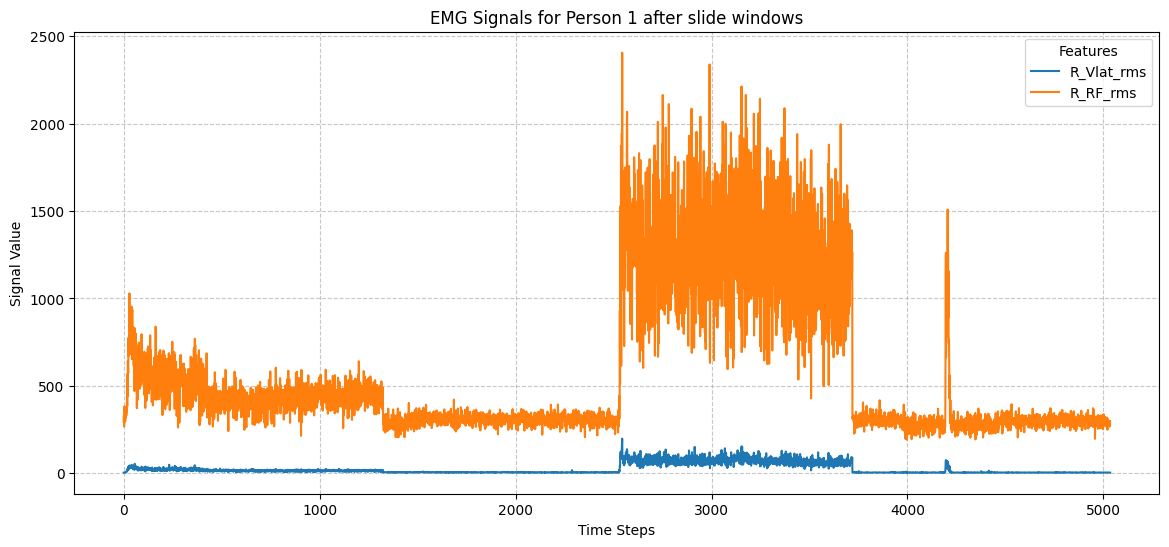

In [ ]:
# people_id = 1
al_emg_person1 = al_emg_df[al_emg_df['person_id'] == 1]

# features R_Vlat, R_RF
al_emg_features = ['R_Vlat_rms', 'R_RF_rms']


plt.figure(figsize=(14, 6))
for feature in al_emg_features:
    plt.plot(al_emg_person1.index, al_emg_person1[feature], label=feature)
plt.title("EMG Signals for Person 1 after slide windows")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Compared to the original data visualization, we can observe that the X-axis range has been reduced to 0-5000. The width and stride of the sliding window determine the time resolution of the output features. Unlike the original signal, the signal processed by the sliding window generates a new feature point at 50-millisecond intervals, significantly reducing the number of data points and narrowing the X-axis range.


The Y-axis trend remains consistent. RMS effectively captures the overall trend of the signal while filtering out short-term noise and high-frequency fluctuations.

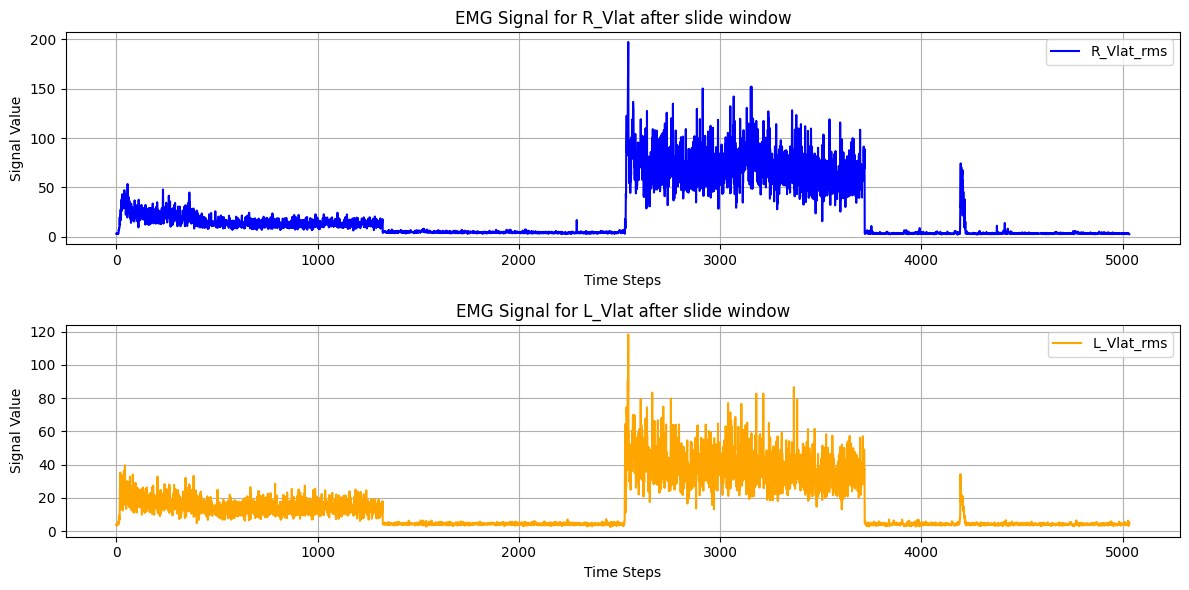

In [ ]:

plt.figure(figsize=(12, 6))

# R_Vlat
plt.subplot(2, 1, 1)
plt.plot(al_emg_person1.index, al_emg_person1['R_Vlat_rms'], color='blue', label='R_Vlat_rms')
plt.title('EMG Signal for R_Vlat after slide window')
plt.xlabel('Time Steps')
plt.ylabel('Signal Value')
plt.grid()
plt.legend()

# L_Vlat
plt.subplot(2, 1, 2)
plt.plot(al_emg_person1.index, al_emg_person1['L_Vlat_rms'], color='orange', label='L_Vlat_rms')
plt.title('EMG Signal for L_Vlat after slide window')
plt.xlabel('Time Steps')
plt.ylabel('Signal Value')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



After sliding window processing, the X-axis range is reduced from the original signal's 500,000 to 5,000. The signal processed by the sliding window appears smoother, with short-term high-frequency fluctuations and noise significantly diminished, while the global trend of the signal is preserved.

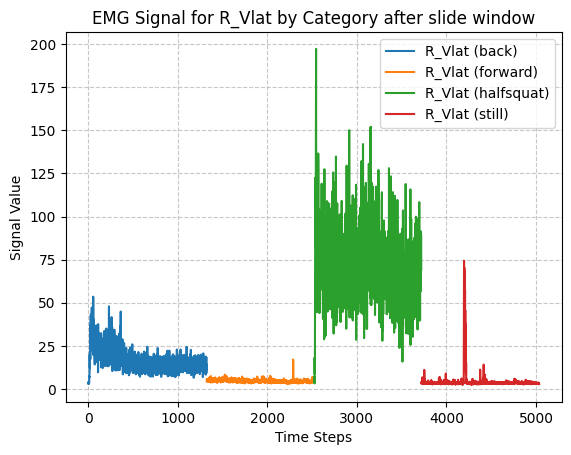

In [ ]:
for category in al_emg_person1['category'].unique():
    subset = al_emg_person1[al_emg_person1['category'] == category]
    plt.plot(subset.index, subset['R_Vlat_rms'], label=f"R_Vlat ({category})")
plt.title("EMG Signal for R_Vlat by Category after slide window")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

### IMU

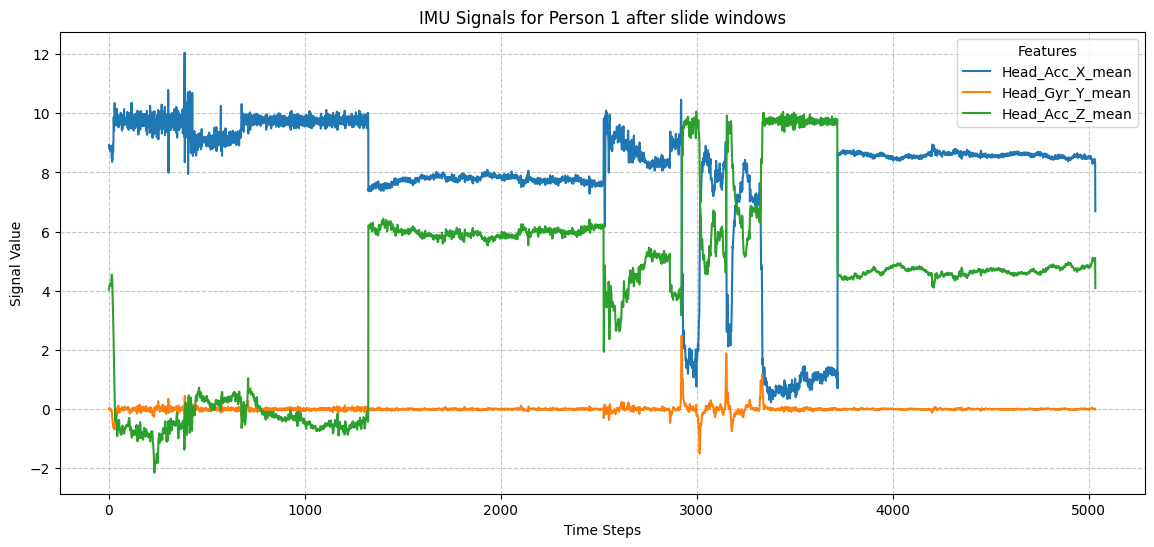

In [ ]:

al_imu_person1 = al_imu_df[al_imu_df['person_id'] == 1]

al_imu_features = ['Head_Acc_X_mean', 'Head_Gyr_Y_mean', 'Head_Acc_Z_mean']


plt.figure(figsize=(14, 6))
for feature in al_imu_features:
    plt.plot(al_imu_person1.index, al_imu_person1[feature], label=feature)
plt.title("IMU Signals for Person 1 after slide windows")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


In this figure, we can observe that the trends of Head_Acc_X_mean, Head_Gyr_Y_mean, and Head_Acc_Z_mean are consistent with the trends of Head_Acc_X, Head_Gyr_Y, and Head_Acc_Z before applying the sliding window. However, the range of the X-axis (time steps) in this figure is reduced compared to the original signal.

This is because the length of the features extracted by the sliding window is shorter than the original signal, due to the selected window size and step size.

### MoCap

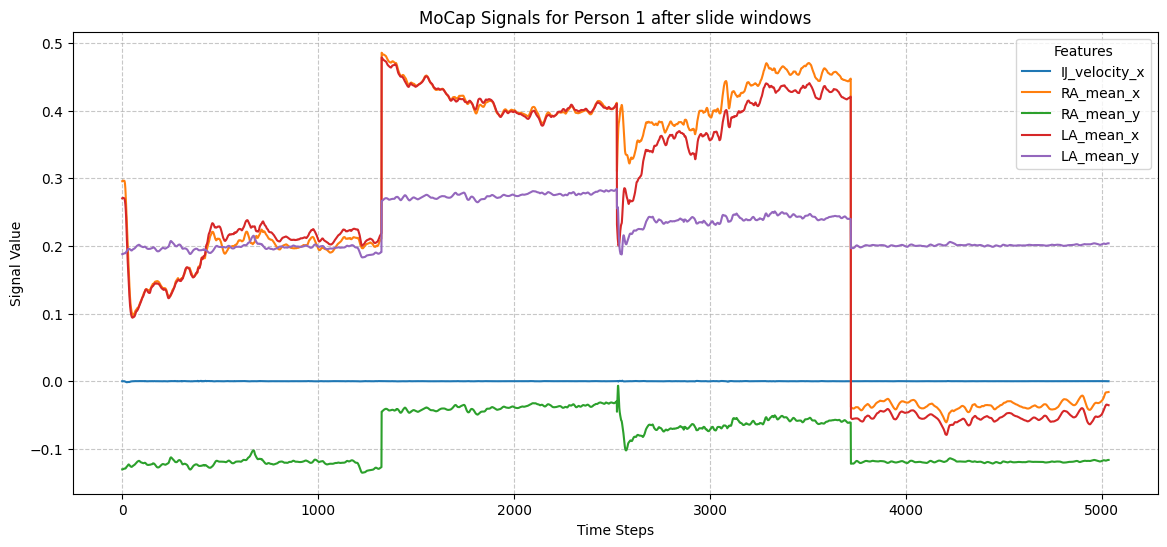

In [ ]:

al_mocap_person1 = al_mocap_df[al_mocap_df['person_id'] == 1]

al_mocap_features = ['IJ_velocity_x', 'RA_mean_x', 'RA_mean_y','LA_mean_x','LA_mean_y']


plt.figure(figsize=(14, 6))
for feature in al_mocap_features:
    plt.plot(al_mocap_person1.index, al_mocap_person1[feature], label=feature)
plt.title("MoCap Signals for Person 1 after slide windows")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend(title="Features", loc="upper right")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Compared to the data before applying the sliding window, we can observe that the range of the X-axis is significantly smaller (0–5,000) after the sliding window operation. This reduction occurs because the sliding window samples and extracts features from the time series at a fixed step size, reducing the number of time steps with each shift.

However, the trends on the Y-axis remain consistent with those before applying the sliding window. This consistency indicates that the sliding window successfully captures the global information of the original signal through its extracted features.







